In [82]:
import xgboost as xgb
import pandas as pd
from datetime import date
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [83]:
df = pd.read_csv("data/faturamento_consolidade_com_feriado_e_receita_da_categoria.csv", parse_dates=["datetime"])
df.shape

(73644, 34)

In [84]:
#df = pd.read_csv("data/faturamento_consolidade_sem_feriado.csv", parse_dates=["datetime"])
#print("Exibindo df..")
#print(df.head())
#dummies_df = pd.get_dummies(df, columns=["feature_05", "feature_01", "feature_02", "feature_11", "feature_12"])
dummies_df = pd.get_dummies(df, columns=["feature_05"])

train_df = dummies_df[~dummies_df["datetime"].isin([date(2017,10,1), date(2017,11,1), date(2017,12,1)])]
test_df =  dummies_df[dummies_df["datetime"].isin([date(2017,10,1), date(2017,11,1), date(2017,12,1)])]

str_cols = []
str_cols.append("datetime")
str_cols.append("receita")

str_cols.append("feature_01")
str_cols.append("feature_02")
str_cols.append("feature_11")
str_cols.append("feature_12")
str_cols.append("receita_trim1")
str_cols.append("receita_trim2")
str_cols.append("receita_trim3")
str_cols.append('receita_ano_passado')
#str_cols.append('cod_loja')
#str_cols.append('categoria_loja')
#str_cols.append('receita_media')

X_train = train_df.drop(str_cols, axis=1, errors="ignore")
y_train = train_df["receita"]

X_test = test_df.drop(str_cols, axis=1, errors="ignore")
y_test = test_df["receita"]


In [85]:
model = CatBoostRegressor()

model.load_model("modelo_catboost_otimizado")

In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9331 entries, 19 to 73643
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cod_loja                        9331 non-null   int64  
 1   cod_ap                          9331 non-null   int64  
 2   cod_municipio                   9331 non-null   int64  
 3   feature_03                      9331 non-null   int64  
 4   feature_04                      9331 non-null   float64
 5   feature_06                      9331 non-null   int64  
 6   feature_07                      9331 non-null   float64
 7   feature_08                      9331 non-null   float64
 8   feature_09                      9331 non-null   float64
 9   feature_10                      9331 non-null   float64
 10  feature_13                      9331 non-null   float64
 11  feature_14                      9331 non-null   float64
 12  feature_15                      

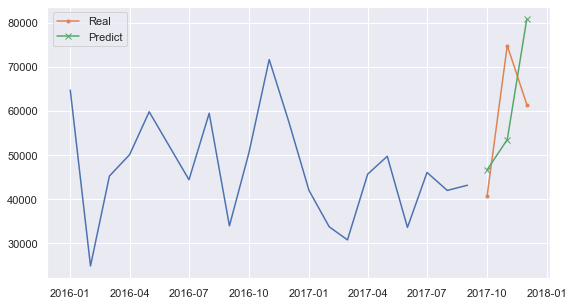

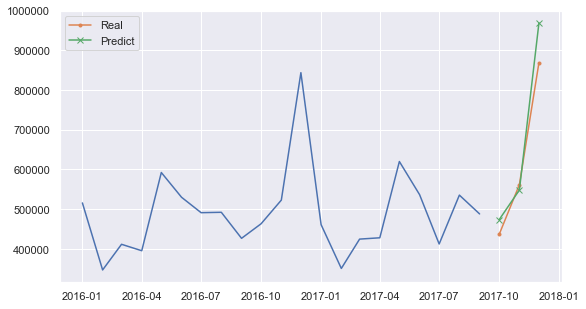

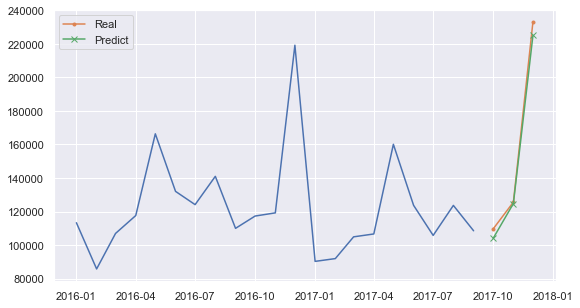

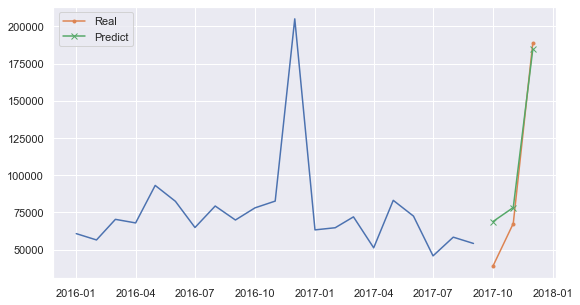

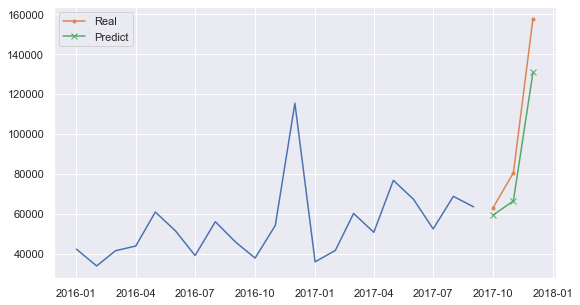

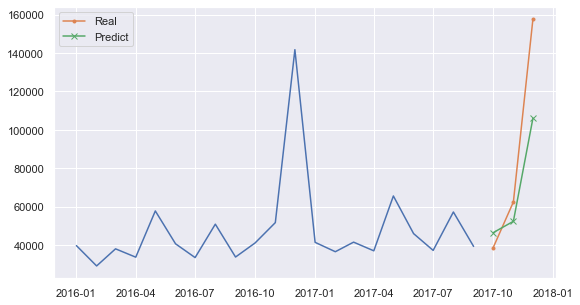

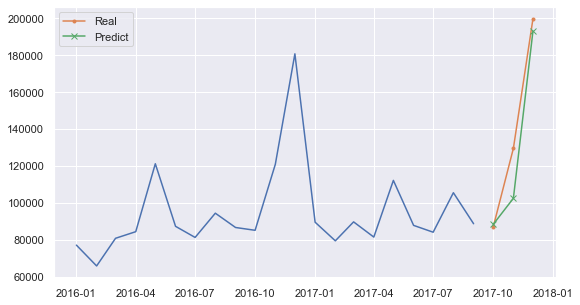

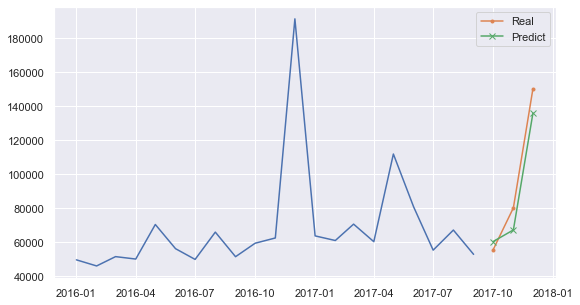

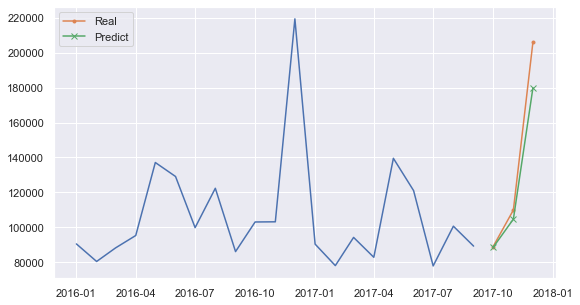

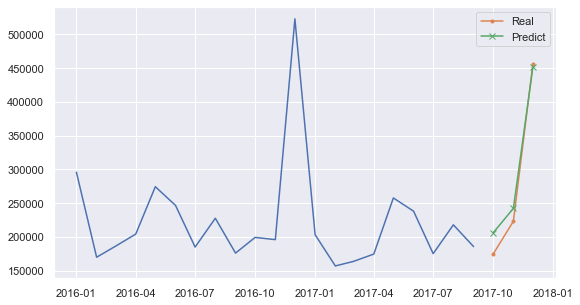

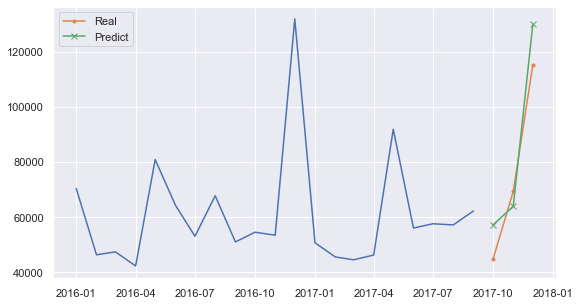

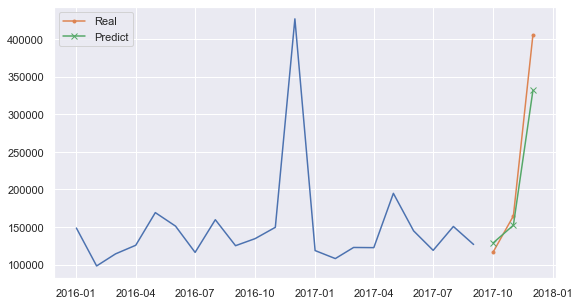

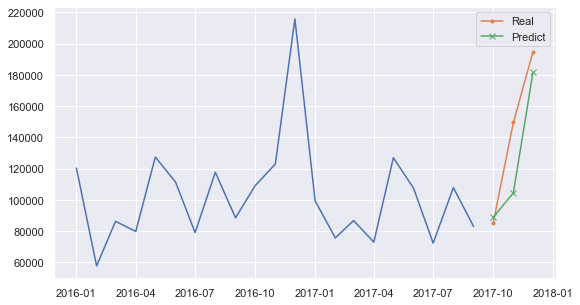

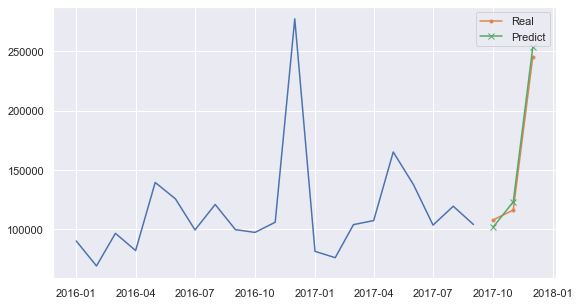

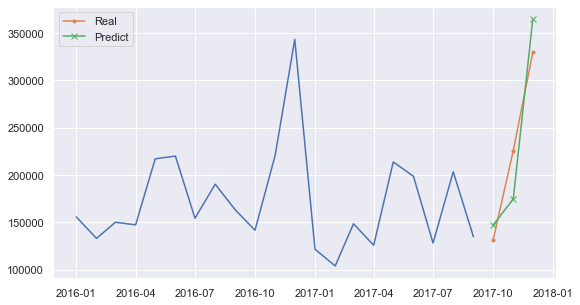

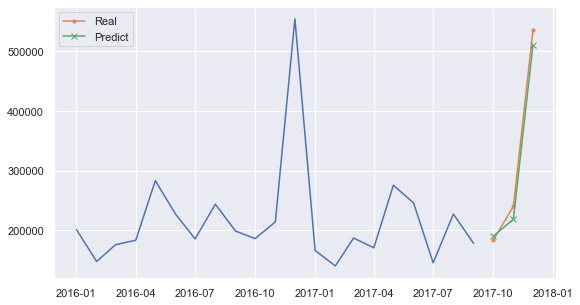

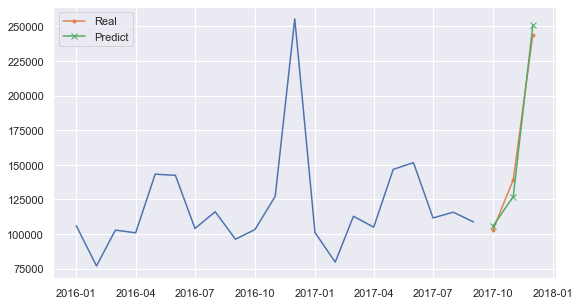

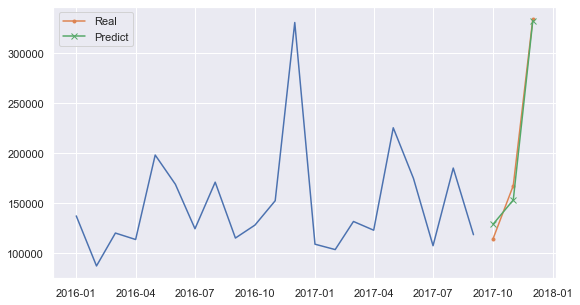

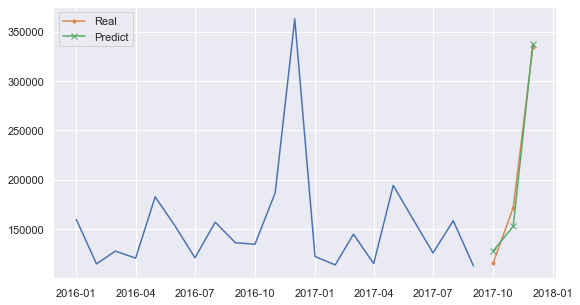

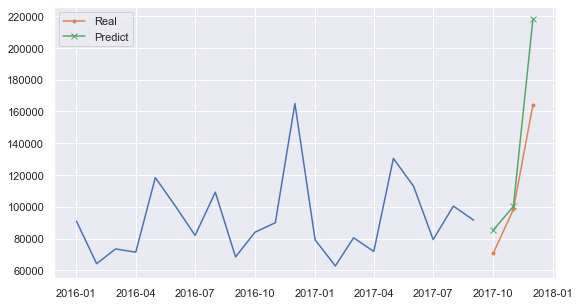

In [87]:
##model.predict(X_test)
for _ in range(20):
    cod_loja = np.random.choice(X_train["cod_loja"].unique())
    train_index = (X_train["cod_loja"] == cod_loja)
    test_index = (X_test["cod_loja"] == cod_loja)

    _train = train_df[train_index].sort_values("datetime")
    _test = test_df[test_index].sort_values("datetime")
    
    col_to_drop = str_cols
    col_to_drop.append("cod_loja")
    y_pred = model.predict(test_df[test_index].drop(col_to_drop, axis=1, errors="ignore"))

    plt.figure(figsize=(9, 5))
    plt.plot(_train["datetime"], _train["receita"])
    plt.plot(_test["datetime"], _test["receita"], label="Real", marker=".")
    plt.plot(_test["datetime"], y_pred, label="Predict", marker="x")
    plt.legend()
    plt.plot()
    plt.show()